In [ ]:
#SAVING HTMLS
import webbrowser
import time
# List of websites separated by newlines
websites_string = '''mediaexpert.pl
#List of websites to be paste here!
.
.
'''
websites_list = websites_string.split('\n')
base_url = "https://www.semrush.com/analytics/overview/?q="
tab_limit = 40
webbrowser.register('chrome', None, webbrowser.BackgroundBrowser("C:\Program Files\Google\Chrome\Application\chrome.exe"))
 
# Open each URL batch in Google Chrome
for i in range(0, len(websites_list), tab_limit):
    batch = websites_list[i:i+tab_limit]
    
    # Open each website in the batch
    for website in batch:
        full_url = base_url + website + "&searchType=domain&protocol=https"
        webbrowser.get('chrome').open_new_tab(full_url)
    # Wait for user input
    input("Press Enter to close the tabs...")
    #subprocess.run(["taskkill", "/F", "/IM", "chrome.exe"])
# Wait for user input
input("Press Enter to open the tabs...")

In [ ]:
#SEMRUSH SCRAPER
import os
import re
import csv

folder_path = "C:\\Users\\Yassine\\Desktop\\html_final"
encoding = "utf-8"
patterns = [r'<span class="___SText_mzmpq-red-team" data-ui-name="Link.Text">(.*?)</span>']            
results = []

# Iterate over HTML files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".html"):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r', encoding='cp1252', errors='replace') as file:
            content = file.read()

            # Extract data based on patterns
            matches = []
            for pattern in patterns:
                pattern_matches = re.findall(pattern, content)
                matches.extend(pattern_matches)

            # Append matches to results list
            results.append(matches)

In [ ]:
# Write the results to a CSV file
csv_file_path = "output.csv"
with open(csv_file_path, "w", newline="") as csv_file:
    writer = csv.writer(csv_file)
    
    # Write header row with pattern names
    writer.writerow(["Pattern {}".format(i+1) for i in range(len(patterns))])

    # Write data rows
    for row in results:
        writer.writerow(row)
        
print("Extraction and CSV creation completed.")

In [2]:
#Data Cleaning:
import pandas as pd
df1 = pd.read_csv('C:\\Users\\Yassine\\Desktop\\output_mix1.csv')
df_filtered = df1[df1['Bounce rate'].str.contains('%', na=False)]
# Store the index values of the rows containing '%'
deleted_rows_index = df1[df1['Bounce rate'].str.contains('%', na=False)].index

df_filtered = df_filtered.iloc[:, :11]
df_filtered = df_filtered.reset_index(drop=True)
df1 = df_filtered

df2 = pd.read_csv('C:\\Users\\Yassine\\Desktop\\output_mix2.csv')
df_filtered = df2[df2['Bounce rate'].str.contains('%', na=False)]
# Store the index values of the rows containing '%'
deleted_rows_index = df2[df2['Bounce rate'].str.contains('%', na=False)].index

df_filtered = df_filtered.iloc[:, :11]
df_filtered = df_filtered.reset_index(drop=True)
df2 = df_filtered

df3 = pd.read_csv('C:\\Users\\Yassine\\Desktop\\output_mix3.csv')
df_filtered = df3[df3['Bounce rate'].str.contains('%', na=False)]
# Store the index values of the rows containing '%'
deleted_rows_index = df3[df3['Bounce rate'].str.contains('%', na=False)].index

df_filtered = df_filtered.iloc[:, :11]
df_filtered = df_filtered.reset_index(drop=True)
df3 = df_filtered

df1 = df1.rename(columns=lambda x: x.replace('Organic Keyword number ', 'Organic Keyword number'))
df2 = df2.rename(columns=lambda x: x.replace('Organic Keyword number ', 'Organic Keyword number'))
df3 = df3.rename(columns=lambda x: x.replace('Organic Keyword number ', 'Organic Keyword number'))
df1 = df1.rename(columns=lambda x: x.replace('Paid keywords ', 'Paid keywords'))
df2 = df2.rename(columns=lambda x: x.replace('Paid keywords ', 'Paid keywords'))
df3 = df3.rename(columns=lambda x: x.replace('Paid keywords ', 'Paid keywords'))

df_combined = pd.concat([df1, df2,df3], ignore_index=True)
df_combined = df_combined.rename(columns=lambda x: x.replace('Unnamed: 1', 'SM_Ranking'))
df = df_combined

In [3]:
df = df.iloc[:300,:]

In [4]:
df

,Domain authority,SM_Ranking,Organic Trafic,Organic Keyword number,Paid Trafic,Paid keywords,Backlinks,Referring Domains,Pages/Visits,Average visit duration,Bounce rate
0,72,3.6K,4.8M,771.8K,153.9K,2.2K,58.6M,80.5K,3.14,7:02,52.20%
1,44,1.6K,209.8K,147.5K,161.6K,747,454.5K,5K,1.79,7:06,68.86%
2,96,143,66.5M,40.3M,4.6M,25.3K,874.1M,290.3K,5.52,12:49,39.68%
3,94,3,155.5M,8.8M,3.6M,28.4K,162.2M,89K,7.08,14:13,32.15%
4,62,118,3.6M,2.2M,17.4K,405,2M,4.4K,3.08,10:12,55.27%
...,...,...,...,...,...,...,...,...,...,...,...
295,93,5.5K,26.9M,11.2M,0,1,91.9M,177.2K,2.42,11:39,67.10%
296,87,5.5K,22M,7.8M,0,0,30.7M,213.8K,1.6,6:44,75.71%
297,69,5.3K,2.2M,777.2K,1,1,7M,25.1K,1.4,11:51,82.21%
298,91,3.9K,26.5M,7.1M,236.5K,3.2K,339.1M,524.1K,2.4,10:35,62.62%


In [2]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Yassine\\Desktop\\website_data.csv')

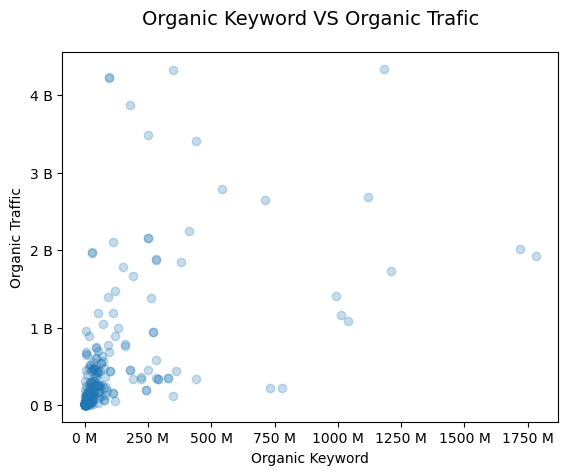

In [407]:
#THE PLOT:
df = pd.read_csv('C:\\Users\\Yassine\\Desktop\\website_data.csv')
df= df.iloc[30:,:]
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create the scatter plot
plt.scatter(df['Organic Keyword number'],df['Organic Trafic'], alpha=0.25)
# Set x and y axis labels
plt.xlabel("Organic Keyword")
plt.ylabel("Organic Traffic")
# Set the chart title
plt.title("Organic Keyword VS Organic Trafic", size= 14, pad = 20)
# Define a custom formatter function
def x_axis_formatter(x, pos):
    if isinstance(x, str) and x == 'web':
        return x
    else:
        return f'{int(x / 1000000)} M'
# Set the custom formatter function for x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(x_axis_formatter))
# Define a custom formatter function
def y_axis_formatter(x, pos):
    if isinstance(x, str) and x == 'web':
        return x
    else:
        return f'{int(x / 1000000000)} B'
# Set the custom formatter function for y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_formatter))


# Display the plot
plt.show()

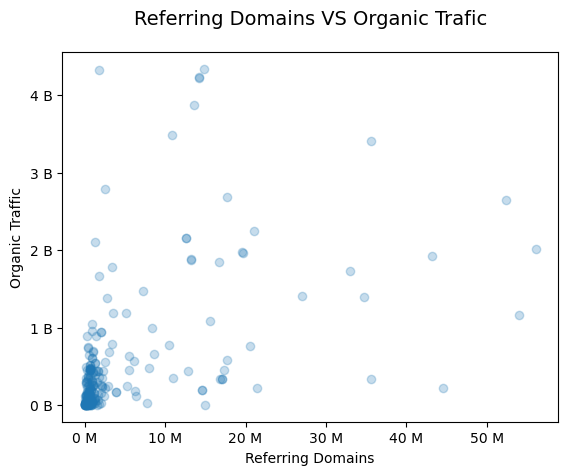

In [408]:
#THE PLOT:
df = pd.read_csv('C:\\Users\\Yassine\\Desktop\\website_data.csv')
df= df.iloc[30:,:]

import matplotlib.pyplot as plt
# Create the scatter plot
plt.scatter(df['Referring Domains'],df['Organic Trafic'], alpha=0.25)

# Define a custom formatter function
def x_axis_formatter(x, pos):
    if isinstance(x, str) and x == 'web':
        return x
    else:
        return f'{int(x / 1000000)} M'
# Set the custom formatter function for x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(x_axis_formatter))



# Define a custom formatter function
import matplotlib.ticker as ticker
def y_axis_formatter(x, pos):
    if isinstance(x, str) and x == 'web':
        return x
    else:
        return f'{int(x / 1000000000)} B'

# Set the custom formatter function for y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_formatter))


# Set x and y axis labels
plt.xlabel("Referring Domains")
plt.ylabel("Organic Traffic")
# Set the chart title
plt.title("Referring Domains VS Organic Trafic", size= 14, pad = 20)
# Display the plot
plt.show()

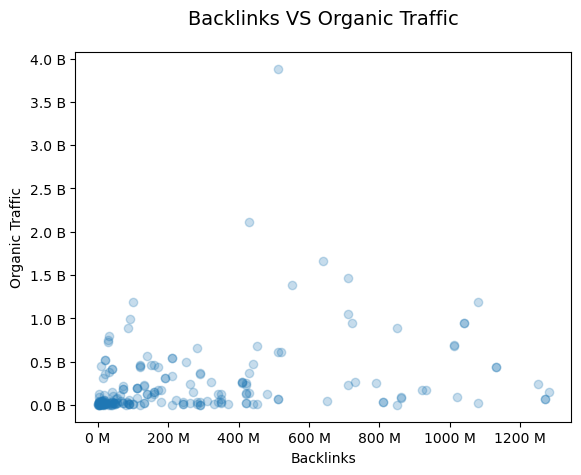

In [409]:
#THE PLOT:
df = pd.read_csv('C:\\Users\\Yassine\\Desktop\\website_data.csv')
# Sort DataFrame by 'Salary' column in descending order
df = df.sort_values('Backlinks', ascending=False)
df= df.iloc[100:,:]

import matplotlib.pyplot as plt
# Create the scatter plot
plt.scatter(df['Backlinks'],df['Organic Trafic'], alpha=0.25)

# Define a custom formatter function
def x_axis_formatter(x, pos):
    if isinstance(x, str) and x == 'web':
        return x
    else:
        return f'{int(x / 1000000)} M'
# Set the custom formatter function for x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(x_axis_formatter))

# Define a custom formatter function
import matplotlib.ticker as ticker
def y_axis_formatter(x, pos):
    if isinstance(x, str) and x == 'web':
        return x
    else:
        return f'{float(x / 1000000000)} B'

# Set the custom formatter function for y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_formatter))


# Set x and y axis labels
plt.xlabel("Backlinks")
plt.ylabel("Organic Traffic")

# Set the chart title
plt.title("Backlinks VS Organic Traffic", size= 14, pad = 20)
# Display the plot
plt.show()

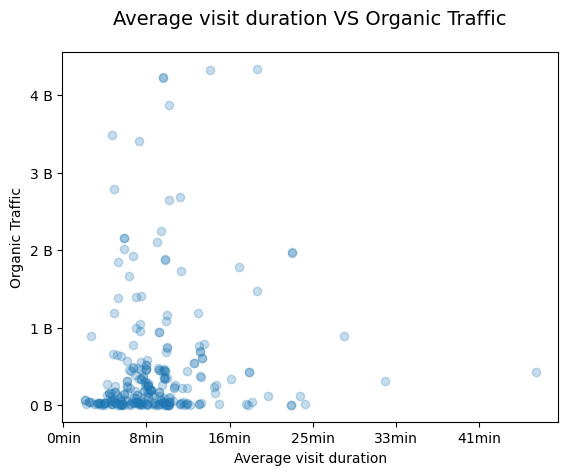

In [410]:
#THE PLOT:
df = pd.read_csv('C:\\Users\\Yassine\\Desktop\\website_data.csv')
df= df.iloc[30:,:]

import matplotlib.pyplot as plt
# Create the scatter plot
plt.scatter(df['Average visit duration'],df['Organic Trafic'], alpha=0.25)

# Define a custom formatter function
import matplotlib.ticker as ticker
def y_axis_formatter(x, pos):
    if isinstance(x, str) and x == 'web':
        return x
    else:
        return f'{int(x / 1000000000)} B'

# Set the custom formatter function for y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_formatter))


# Define a custom formatter function
def x_axis_formatter(x, pos):
    if isinstance(x, str) and x == 'web':
        return x
    else:
        return f'{int(x / 60)}min'

# Set the custom formatter function for x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(x_axis_formatter))


# Set x and y axis labels
plt.xlabel("Average visit duration")
plt.ylabel("Organic Traffic")
# Set the chart title
plt.title("Average visit duration VS Organic Traffic", size= 14, pad = 20)
# Display the plot
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Yassine\\Desktop\\website_data.csv')

In [39]:
# Correlation Analysis 
import pandas as pd
df = pd.read_csv('C:\\Users\\Yassine\\Desktop\\website_data.csv')
list_of_factors = ['Backlinks', 'Referring Domains', 'Organic Keyword number', 'Average visit duration']
coefficients = []  # Initialize an empty list to store coefficients
p_values = []  # Initialize an empty list to store p-values

for factor in list_of_factors:
    coeff, p_value = stats.pearsonr(df['Organic Trafic'], df[factor])
    coefficients.append(abs(coeff))
    p_values.append(p_value)
    
# Create a DataFrame with the coefficients and p-values
results_df = pd.DataFrame({'Factor': list_of_factors, 'Coefficient': coefficients, 'P-value': p_values})
# Sort the DataFrame by 'Coefficient' in descending order
results_df = results_df.sort_values(by='Coefficient', ascending=False)
results_df

,Factor,Coefficient,P-value
0,Backlinks,0.927303,4.627881e-130
1,Referring Domains,0.801535,5.718413e-69
2,Organic Keyword number,0.642773,1.352802e-36
3,Average visit duration,0.351051,3.469863e-10


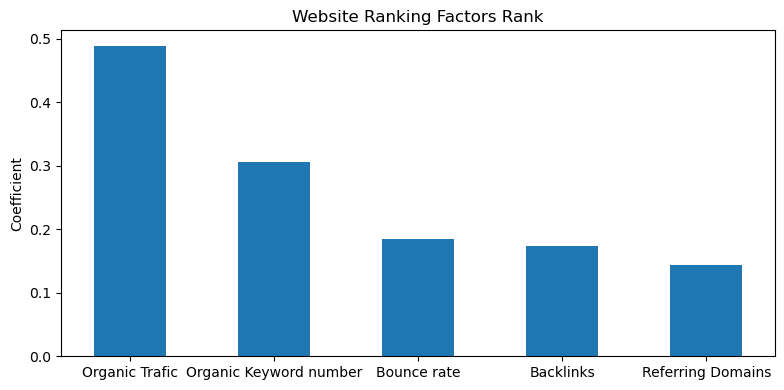

In [75]:
# Plotting the bar plot
plt.figure(figsize=(8, 4))
plt.bar(results_df['Factor'], results_df['Coefficient'], width=0.5)
#plt.xlabel('Factor')
plt.ylabel('Coefficient')
plt.title("Website Ranking Factors Rank")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [68]:
import scipy.stats as stats

list_of_factors= ['Organic Trafic','Backlinks','Organic Keyword number','Referring Domains','Bounce rate']
coefficients = []  # Initialize an empty list to store coefficients
p_values = []  # Initialize an empty list to store p-values

for factor in list_of_factors:
    coeff, p_value = stats.spearmanr(-df['SM_Ranking'], df[factor])
    coefficients.append(abs(coeff))
    p_values.append(p_value)
    
# Create a DataFrame with the coefficients and p-values
results_df = pd.DataFrame({'Factor': list_of_factors, 'Coefficient': coefficients, 'P-value': p_values})
# Sort the DataFrame by 'Coefficient' in descending order
results_df = results_df.sort_values(by='Coefficient', ascending=False)
results_df

,Factor,Coefficient,P-value
0,Organic Trafic,0.489154,1.424281e-19
2,Organic Keyword number,0.305935,5.789939e-08
4,Bounce rate,0.185552,1.198035e-03
1,Backlinks,0.173642,2.461007e-03
3,Referring Domains,0.143714,1.241517e-02


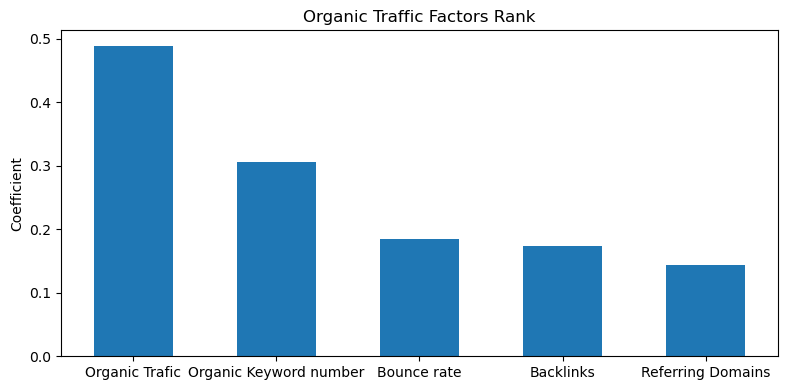

In [72]:
# Plotting the bar plot
plt.figure(figsize=(8, 4))
plt.bar(results_df['Factor'], results_df['Coefficient'], width=0.55)
#plt.xlabel('Factor')
plt.ylabel('Coefficient')
plt.title("Organic Traffic Factors Rank")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
corr_table.to_csv('corr_table.csv', index=False)